# Max condition number w/ positive gains

Tests maximum condition number that can be whitened with exclusively positve gains
at each orientation by the Mercedes Benz frame in R2.

In [2]:
import numpy as np
import frame_whitening as fw
import frame_whitening.plot as fwplt
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir(os.path.expanduser("~/frame_whitening"))
print(os.getcwd())

/mnt/home/lduong/frame_whitening


[1. 1. 1.]
deg where min-max is achieved: 90.00 deg


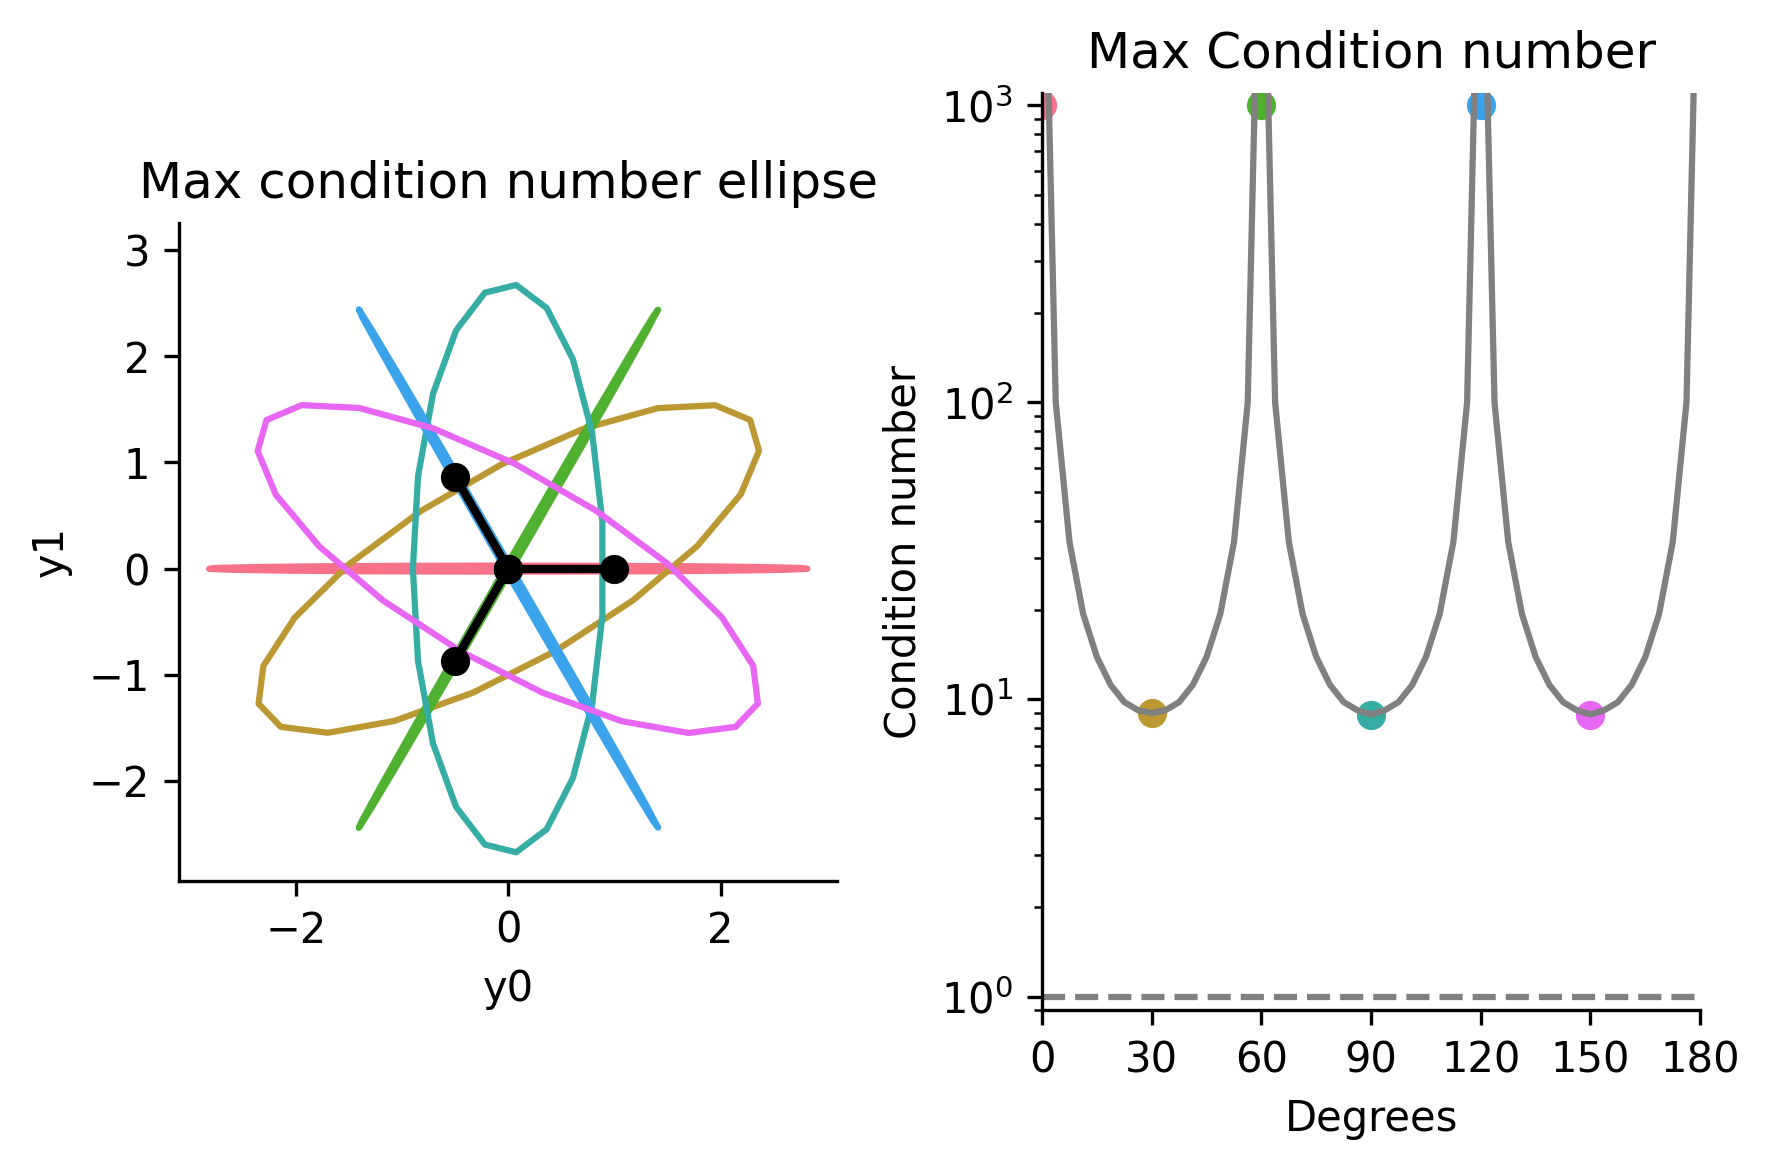

In [3]:
W = fw.get_mercedes_frame(parseval=False, jitter=False)
print(np.linalg.norm(W, axis=0))

dt = np.pi / 48
all_thetas = np.arange(0, np.pi + dt, dt)
kappas = np.ones_like(all_thetas)

all_kappas = np.concatenate((np.arange(1, 100, 0.1), np.ones(1) * 10000))

eps = 1e-6
fig, ax = plt.subplots(1, 2, dpi=300)
angles_to_plot = [0.0, 30.0, 60.0, 90.0, 120.0, 150.0]
cols = sns.color_palette("husl", n_colors=len(angles_to_plot))
counter = 0
for i, th in enumerate(all_thetas):
    V = fw.orthogonal2(th)  # 2d rotation matrix

    for k in all_kappas:
        cov = V @ np.diag([k, 1.0]) * (2 / (k + 1)) @ V.T
        cov_sqrt = fw.psd_sqrt(cov)
        g = fw.compute_g_opt(cov_sqrt, W)
        if np.all(g > 0):
            kappas[i] = k
    if np.round(np.rad2deg(th)) in angles_to_plot:
        cov_plot = V @ np.diag([kappas[i], 1.0]) * (2 / (kappas[i] + 1)) @ V.T
        fwplt.plot_ellipse(cov_plot, ax=ax[0], **{"color": cols[counter]})
        counter += 1

print(
    f"deg where min-max is achieved: {np.rad2deg(all_thetas[np.argmin(kappas)]):.2f} deg"
)

fwplt.plot_frame2d(W, ax[0])

ax[1].plot(np.rad2deg(all_thetas), kappas, color="grey")
for i, theta in enumerate(angles_to_plot):
    k = kappas[np.argmin(np.abs(all_thetas - np.deg2rad(theta)))]
    ax[1].scatter(theta, np.min([k, 1000]), color=cols[i])

ax[1].hlines(1.0, 0, 180, linestyles="--", color="grey")
ax[0].set(title="Max condition number ellipse", xlabel="y0", ylabel="y1")
ax[0].axis("square")
ax[1].set(
    title="Max Condition number",
    ylabel="Condition number",
    xlabel="Degrees",
    yscale="log",
    xlim=(0, 180),
    ylim=(0.9, 1e3 + 100),
    xticks=np.linspace(0, 180, 7),
)
fig.tight_layout()
sns.despine()

In [ ]:
fig.savefig(
    "figures/fig_outputs/cond_number_r2.png",
    transparent=True,
    bbox_inches="tight",
    dpi=300,
)